In [127]:
import numpy as np
import matplotlib.pyplot as plt
from ipythonblocks import BlockGrid

# Aplicación de MCMC
_Elaborado por: Andrés Urbano Guillermo Gerardo_

Las técnias de Monte Carlo vía cadenas de Markov permiten generar, de menera iterativa, observaciones de distribuciones multivariadas que difícilmente podrían simularse. 

La idea básica es construir una cadena de Markov que sea fácil de simular y cuya distribución estacionaria corresponda a la distribución objetivo que nos interesa. De esta manera, al implementar correctamente el algoritmo, la convergencia de la cadena está garantizada, independientemente de cuáles sean los valores iniciales.

Las ideas de esta técnica han tenido su desarrollo histórico desde diferentes ramas de las matematicas: de la probabilidad, de la mecánica estadística y de la estadística bayesiana. Cada enfoque tiene su utilidad conceptual y de implementación, y se enriquecen entre ellos.


## Instrucciones

Considere un tablero de $8\times8$; una configuración del tablero es una asignación de colores (blanco y negro)
en las casillas (C : \{1, 2, . . . , 64\} → {0, 1}).

Decimos que la configuración es aceptable si no hay dos cuadritos
adyacentes de color negro (por ejemplo, un cuadrito genérico tiene 4 cuadritos adyacentes y cada esquina tiene dos cuadritos adyacentes).

Trabajaremos con el espacio de estados C que reúne a todas las configuraciones aceptables. Considere
una caminata aleatoria $(X_n)n \geq 0$ con espacio de estados en C que satisface:


- La configuración inicial $X_0$ tiene todos los cuadritos blancos.
- Dado que conocemos $X_n$, construimos $X_{n+1}$ de la siguiente forma:
    1.  Elige una casilla c uniformemente al azar y lanza una moneda justa.
    1. Si la moneda sale águila entonces $X_{n+1} = X_n$.
    1.  Si la moneda sale sol entonces intercambiamos el color de la casilla c (de blanco a negro o viceversa) y, sólo si esto genera una configuración aceptable, ésta es la siguiente configuración $X_{n+1}$.
    1.  en otro caso hacemos $X_{n+1} = X_n$.

## Implementación

In [53]:
def lanzar_moneda() -> str:
    """Simula el lanzamiento de un volado"""
    moneda = "sol" if np.random.binomial(1, 0.5) else "aguila"
    return moneda

def es_aceptable(tablero: 'GridBlock', casilla: tuple) -> bool:
    """Verifica que sea una configuracion aceptable"""                    
    negro = (0, 0, 0)
    # Vericamos las casilla adyacentes (izq, der, abajo, arriba)
    if casilla[1] > 0 and tablero[casilla[0], casilla[1]-1].rgb == negro:
        return False
    elif casilla[1] < 7 and tablero[casilla[0], casilla[1]+1].rgb == negro:
        return False
    elif casilla[0] > 0 and tablero[casilla[0]-1, casilla[1]].rgb == negro:
        return False
    elif casilla[0] < 7 and tablero[casilla[0]+1, casilla[1]].rgb == negro:
        return False
    return True    

In [122]:
def simulacion(tablero: 'GridBlock', n: int, blanco: tuple, time=None) -> int:
    """Realiza la simulacion de una cadena de markov utilizando el Algoritmo Metrópolis Hastings"""
    cuadros_negros = 0
    for i in range(n):
        modena = lanzar_moneda()
        casilla_azar = np.random.randint(0,8), np.random.randint(0,8)
        if modena == 'sol' and es_aceptable(tablero, casilla_azar):              
            # Intercambiar color
            if tablero[casilla_azar].rgb == blanco:
                tablero[casilla_azar] = (0, 0, 0)
                cuadros_negros += 1
            else:
                tablero[casilla_azar] = blanco
                cuadros_negros -= 1
        if time is not None:
            tablero.flash(display_time=time)
    return cuadros_negros

In [145]:
blanco = (237, 237, 237)
tablero = BlockGrid(8, 8, fill=blanco, block_size=45)
simulacion(tablero, 400, blanco, time=0.1)
tablero

,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


**Proposición**. Sea $(X_n)_{n \geq 0}$ una cadena de Markov homogénea, irreducible y aperiódica con espacio de estados E y distribución estacionaria $\pi$, se tiene que cuando $n \rightarrow \infty$ ocurre que

$$X_n \xrightarrow{\text{d}} X$$

donde X tiene distribución $\pi$.

Vemos que en nuestro simulación la distribucion estacionario converge a un tablero de ajedrez cuando n toma valores muy grandes.

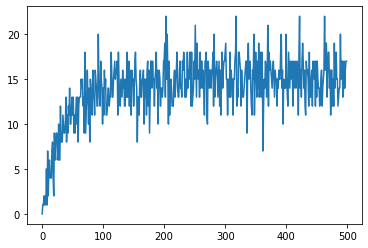

In [155]:
simulaciones = 500
cuadros_negros = []
for i in range(simulaciones):
    tablero = BlockGrid(8, 8, fill=blanco, block_size=10)    
    cuadros_negros.append(simulacion(tablero, i, blanco))
x = np.arange(simulaciones)
y = np.array(cuadros_negros)
plt.plot(x, y)